In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

In [4]:
sales_report=pd.read_csv(r"C:\Users\yadav\OneDrive\Desktop\python learning\zepto_sales.csv")
products_report=pd.read_csv(r"C:\Users\yadav\OneDrive\Desktop\python learning\zepto_products.csv")

In [5]:
print("basic info related to sales")

print(sales_report.info())
print(sales_report.describe())
print(sales_report.shape)
print(sales_report.head())
print(sales_report.tail())

basic info related to sales
<class 'pandas.DataFrame'>
RangeIndex: 220220 entries, 0 to 220219
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            220220 non-null  int64  
 1   order_date          220220 non-null  str    
 2   product_id          220220 non-null  int64  
 3   quantity            220220 non-null  int64  
 4   city                219118 non-null  str    
 5   delivery_status     219118 non-null  str    
 6   customer_id         220220 non-null  int64  
 7   delivery_time_mins  215817 non-null  float64
 8   total_amount        220220 non-null  float64
dtypes: float64(2), int64(4), str(3)
memory usage: 15.1 MB
None
            order_id     product_id       quantity    customer_id  \
count  220220.000000  220220.000000  220220.000000  220220.000000   
mean   152325.652429     119.214218       1.548633   60016.100023   
std     30172.200347      12.097782       1.003054  

In [6]:
print("basic info related to[product]")

print(products_report.info())
print(products_report.describe())
print(products_report.shape)
print(products_report.head())
print(products_report.tail())

basic info related to[product]
<class 'pandas.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    38 non-null     int64  
 1   product_name  38 non-null     str    
 2   category      38 non-null     str    
 3   base_price    38 non-null     float64
dtypes: float64(1), int64(1), str(2)
memory usage: 1.3 KB
None
       product_id  base_price
count   38.000000   38.000000
mean   119.500000  211.414474
std     11.113055  139.411328
min    101.000000   23.250000
25%    110.250000  105.307500
50%    119.500000  188.005000
75%    128.750000  290.127500
max    138.000000  531.370000
(38, 4)
   product_id product_name             category  base_price
0         101        Apple  Fruits & Vegetables      103.13
1         102       Banana  Fruits & Vegetables       23.25
2         103        Onion  Fruits & Vegetables       55.75
3         104       Potato  Fruits & Ve

In [7]:
#---for knowing sales columns
print(sales_report.columns)

Index(['order_id', 'order_date', 'product_id', 'quantity', 'city',
       'delivery_status', 'customer_id', 'delivery_time_mins', 'total_amount'],
      dtype='str')


In [8]:
#---for counting total null values
print(sales_report.isnull().sum())

order_id                 0
order_date               0
product_id               0
quantity                 0
city                  1102
delivery_status       1102
customer_id              0
delivery_time_mins    4403
total_amount             0
dtype: int64


In [9]:
sales_report.dropna(subset=["city","delivery_status"], inplace=True)
#--after removing null values
print(sales_report.isnull().sum())

order_id                 0
order_date               0
product_id               0
quantity                 0
city                     0
delivery_status          0
customer_id              0
delivery_time_mins    4346
total_amount             0
dtype: int64


In [12]:
#-- for fill up columns with mean
mean_dtmins= sales_report["delivery_time_mins"].mean()

In [13]:
print(sales_report.isnull().sum())

order_id                 0
order_date               0
product_id               0
quantity                 0
city                     0
delivery_status          0
customer_id              0
delivery_time_mins    4346
total_amount             0
dtype: int64


In [14]:
#---for knowing duplicate values
print("duplicates  =", sales_report.duplicated().sum())

duplicates  = 216


In [18]:
# --for dropping duplicates values
sales_report.drop_duplicates(inplace=True)
print(f"number of rows after removing duplicates :{sales_report.shape[0]}")

number of rows after removing duplicates :217806


In [19]:

sales_report["order_date"] = pd.to_datetime(sales_report["order_date"])
print("__data type after cleaning__")
print(sales_report.info())

__data type after cleaning__
<class 'pandas.DataFrame'>
Index: 217806 entries, 0 to 220219
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            217806 non-null  int64         
 1   order_date          217806 non-null  datetime64[us]
 2   product_id          217806 non-null  int64         
 3   quantity            217806 non-null  int64         
 4   city                217806 non-null  str           
 5   delivery_status     217806 non-null  str           
 6   customer_id         217806 non-null  int64         
 7   delivery_time_mins  213463 non-null  float64       
 8   total_amount        217806 non-null  float64       
dtypes: datetime64[us](1), float64(2), int64(4), str(2)
memory usage: 16.6 MB
None


In [20]:
sales_min=sales_report["total_amount"].min()
print(f"min of total amount :{sales_min}")
sales_max=sales_report["total_amount"].max()
print(f"max of total_amount :{sales_max }")
sales_avg=sales_report["total_amount"].mean()
print(f"avg of total amount: {sales_avg}")
print(products_report.columns)

min of total amount :23.25
max of total_amount :2656.85
avg of total amount: 302.3239065039531
Index(['product_id', 'product_name', 'category', 'base_price'], dtype='str')


In [21]:
print("------top 5 products-----")
top_products =(
    products_report.groupby("product_name")["base_price"].sum().nlargest(5)
)
print(top_products)

------top 5 products-----
product_name
Detergent 1kg    531.37
Toilet Paper     513.21
Garbage Bags     478.38
Floor Cleaner    421.68
Handwash         390.59
Name: base_price, dtype: float64


In [22]:
print("------top 5 sales-----")
top_sales=(
    sales_report.groupby("product_id")["total_amount"].sum().nlargest(5)
)
print(top_sales)


------top 5 sales-----
product_id
134    11658720.91
112     7908234.46
135     6171994.29
129     4796676.99
131     4716913.11
Name: total_amount, dtype: float64


In [23]:
#Merging with product details to get product names

top_products_detail=(
    top_products.reset_index().merge(products_report,on="product_id")
)
print(top_products_detail[["product_name","category","total_amount"]])

KeyError: 'product_id'

In [24]:
# Total Sales by City
print("---Total Sales by City--")
sales_by_city = (
    sales_report.groupby("city")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)
print(sales_by_city)

---Total Sales by City--
city
Mumbai       23063075.50
Bangalore    16385777.49
Delhi         9937151.01
Hyderabad     5305224.53
Pune          4559465.47
Kolkata       2671042.99
Chennai       2563667.49
Ahmedabad     1362556.30
Name: total_amount, dtype: float64


In [25]:
# Average Delivery Time by City
print("--Average Delivery Time by City--")
avg_delivery_time_by_city=(
    sales_report.groupby("city")["delivery_time_mins"].mean().sort_values(ascending=True)
)
print(avg_delivery_time_by_city)

--Average Delivery Time by City--
city
Hyderabad    25.912324
Mumbai       25.978455
Bangalore    26.015707
Delhi        26.038069
Pune         26.041582
Chennai      26.060067
Kolkata      26.090763
Ahmedabad    26.173903
Name: delivery_time_mins, dtype: float64


In [26]:
#  monthly sales trend
print("trend of monthly sales")
sales_report["month"]=sales_report["order_date"].dt.to_period("M")
monthly_sales = sales_report.groupby("month")["total_amount"].sum()
print(monthly_sales)



trend of monthly sales
month
2024-01    5593297.49
2024-02    5286182.10
2024-03    5569350.76
2024-04    5375568.99
2024-05    5574801.37
2024-06    5380702.74
2024-07    5523114.55
2024-08    5468629.63
2024-09    5386353.65
2024-10    5547622.90
2024-11    5451878.37
2024-12    5690458.23
Freq: M, Name: total_amount, dtype: float64


In [53]:
sales_by_category =sales_report.merge(products_report,on ="product_id")
sales_by_category =sales_by_category.groupby("category")["total_amount"].sum().sort_values(ascending=False)

print(sales_by_category)

category
Personal Care           23399215.51
Dairy & Eggs            12344371.12
Household Essentials    11975638.84
Munchies                 8083367.83
Beverages                6598799.13
Fruits & Vegetables      3446568.35
Name: total_amount, dtype: float64


In [29]:
###visual section
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

C:\Users\yadav\AppData\Local\Temp\ipykernel_7720\1555511220.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='magma', ax=axes[0, 1])
C:\Users\yadav\AppData\Local\Temp\ipykernel_7720\1555511220.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='delivery_status', data=sales_report, palette='deep', ax=axes[1, 2])
C:\Users\yadav\AppData\Local\Temp\ipykernel_7720\1555511220.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='delivery_time_mins', data=sales_report, pal

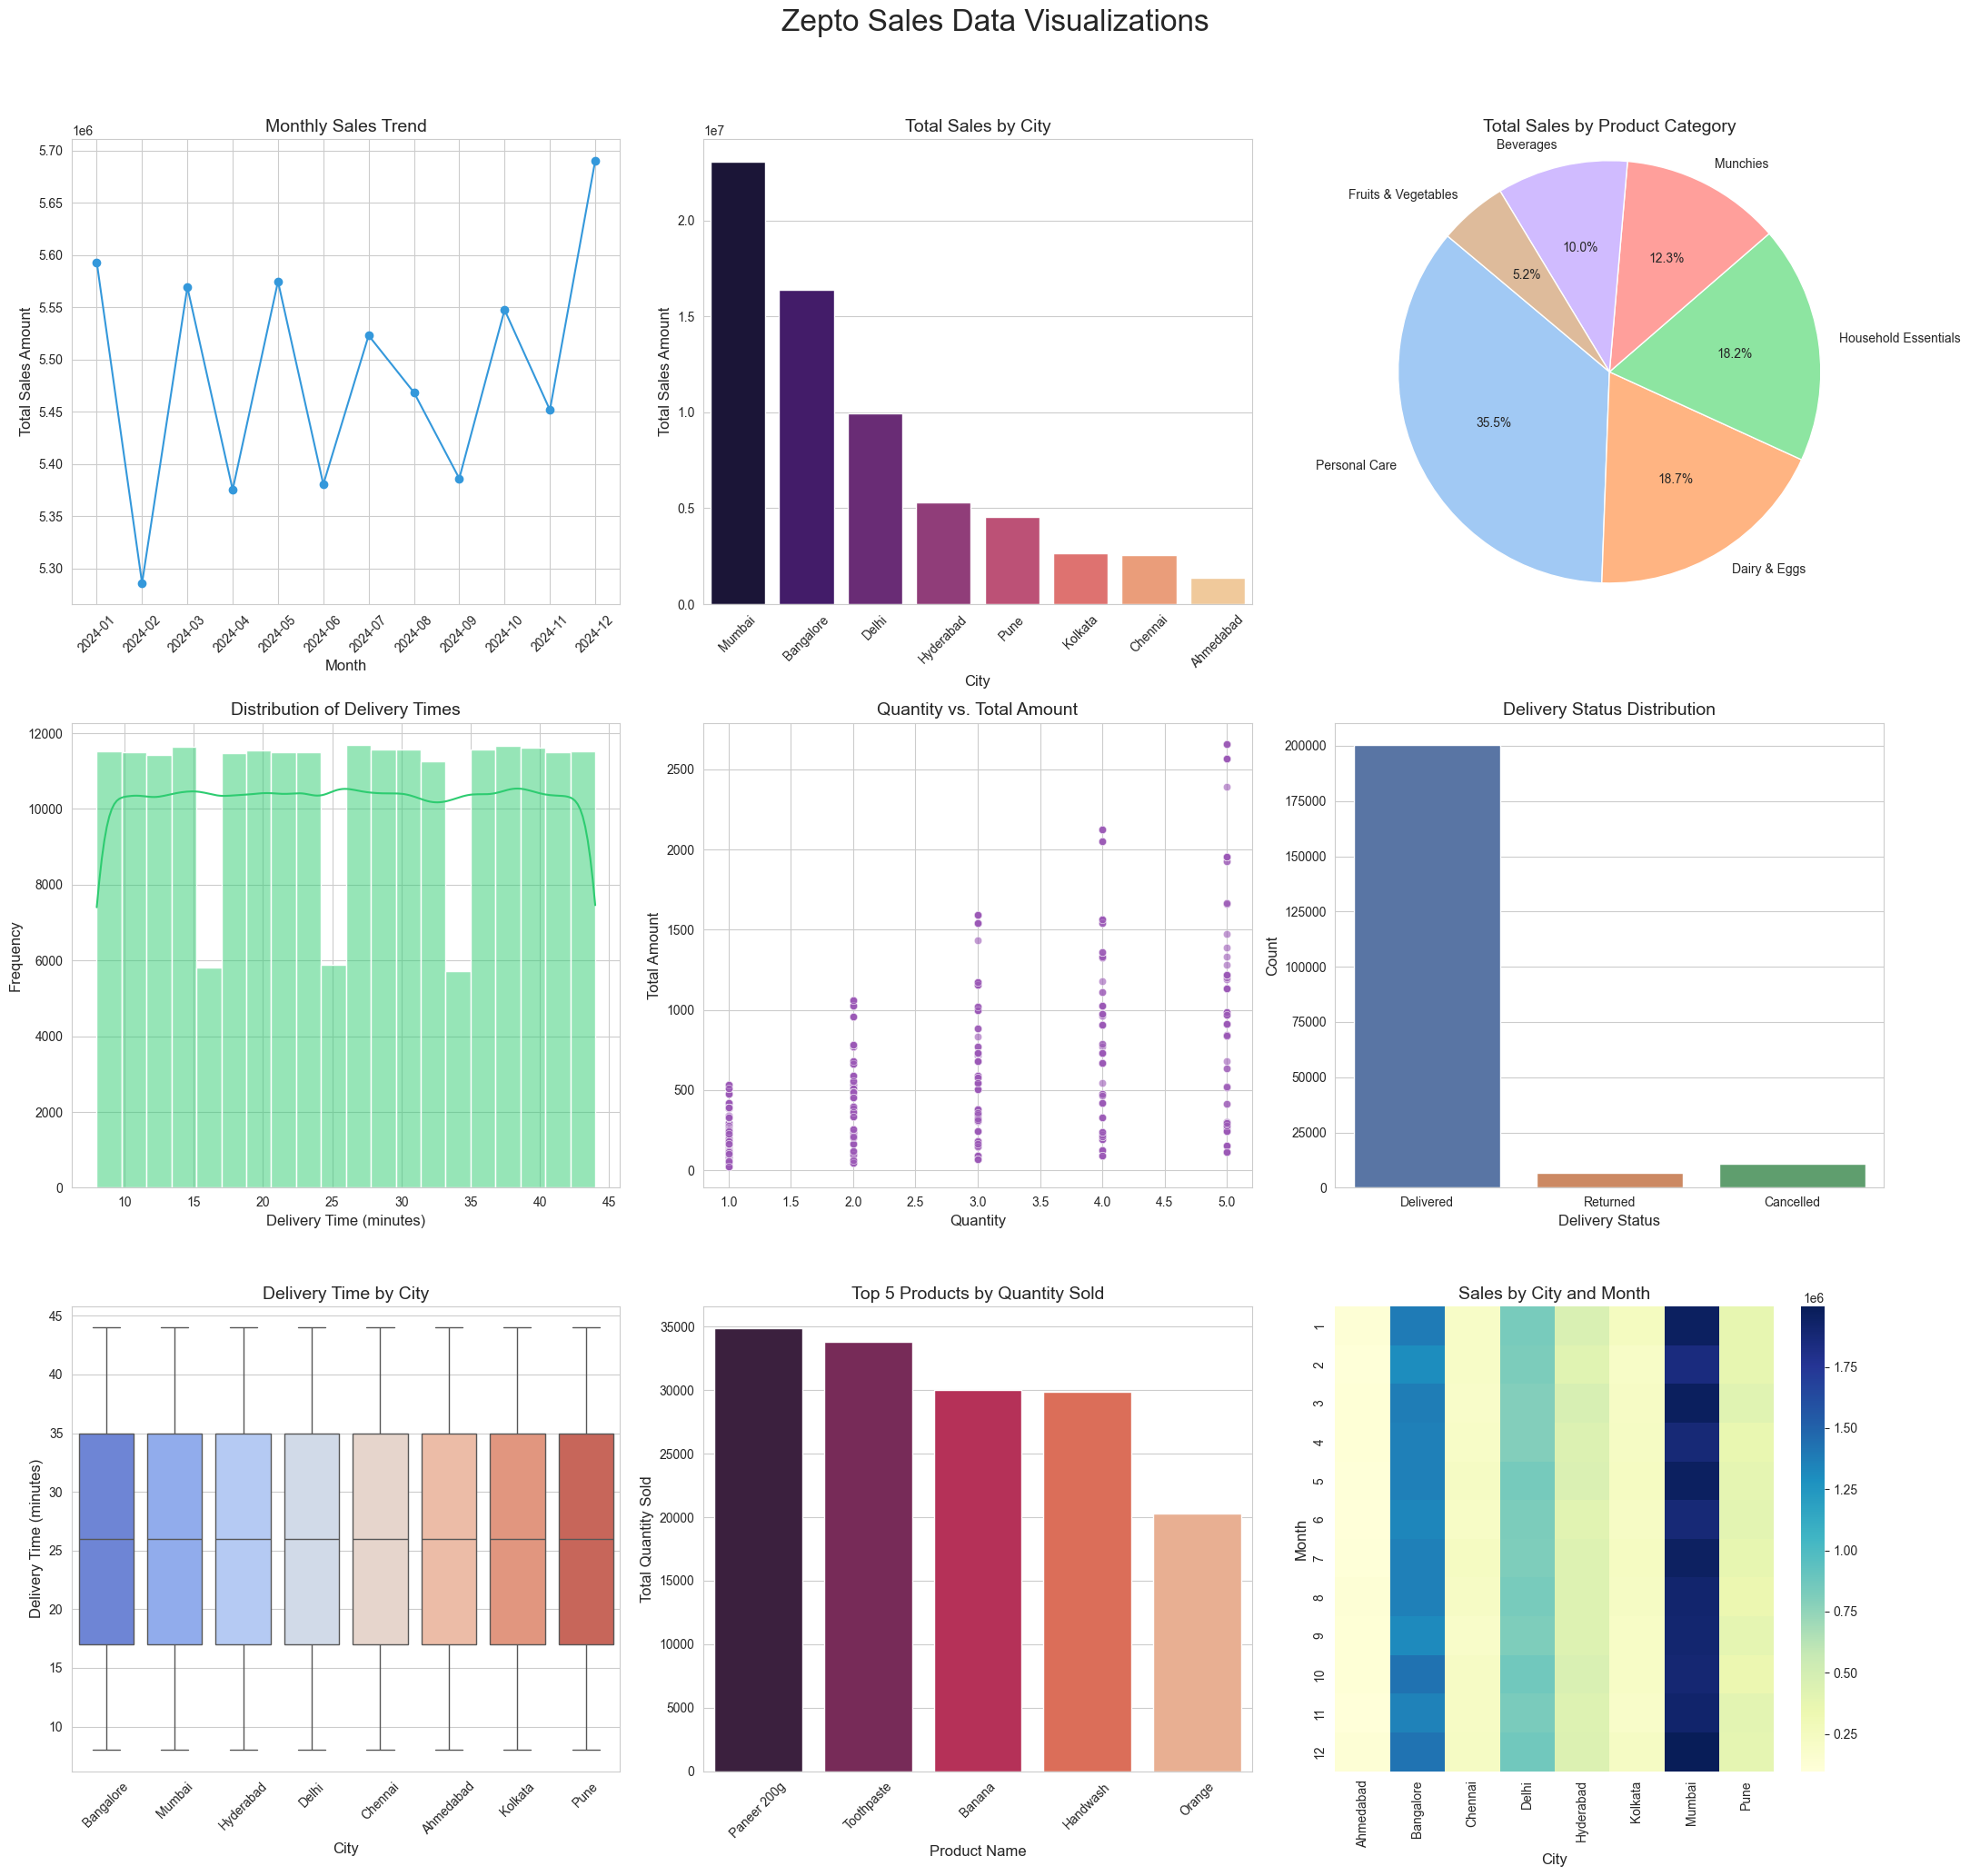

In [54]:
# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(22, 20))
fig.suptitle("Zepto Sales Data Visualizations", fontsize=24, y=1.03)
# Plot 1: Monthly Sales Trend (Line Chart)
axes[0, 0].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='#3498DB')
axes[0, 0].set_title('Monthly Sales Trend', fontsize=14)
axes[0, 0].set_xlabel('Month', fontsize=12)
axes[0, 0].set_ylabel('Total Sales Amount', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True)

# Plot 2: Total Sales by City (Bar Chart)
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='magma', ax=axes[0, 1])
axes[0, 1].set_title('Total Sales by City', fontsize=14)
axes[0, 1].set_xlabel('City', fontsize=12)
axes[0, 1].set_ylabel('Total Sales Amount', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

#Plot 3: Sales by Product Category (Pie Chart)
axes[0, 2].pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[0, 2].set_title('Total Sales by Product Category', fontsize=14)
axes[0, 2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot 4: Distribution of Delivery Times (Histogram)
sns.histplot(sales_report['delivery_time_mins'], bins=20, kde=True, color='#2ECC71', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Delivery Times', fontsize=14)
axes[1, 0].set_xlabel('Delivery Time (minutes)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Plot 5: Quantity vs. Total Amount (Scatter Plot)
sns.scatterplot(x='quantity', y='total_amount', data=sales_report.sample(n=5000), alpha=0.6, color='#9B59B6', ax=axes[1, 1]) # Sample for performance
axes[1, 1].set_title('Quantity vs. Total Amount', fontsize=14)
axes[1, 1].set_xlabel('Quantity', fontsize=12)
axes[1, 1].set_ylabel('Total Amount', fontsize=12)

# Plot 6: Delivery Status Distribution (Count Plot)
sns.countplot(x='delivery_status', data=sales_report, palette='deep', ax=axes[1, 2])
axes[1, 2].set_title('Delivery Status Distribution', fontsize=14)
axes[1, 2].set_xlabel('Delivery Status', fontsize=12)
axes[1, 2].set_ylabel('Count', fontsize=12)

# Plot 7: Delivery Time by City (Box Plot)
sns.boxplot(x='city', y='delivery_time_mins', data=sales_report, palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('Delivery Time by City', fontsize=14)
axes[2, 0].set_xlabel('City', fontsize=12)
axes[2, 0].set_ylabel('Delivery Time (minutes)', fontsize=12)
axes[2, 0].tick_params(axis='x', rotation=45)

# Plot 8: Top 5 Products by Quantity Sold (Bar Plot)
top_products_qty = sales_report.groupby('product_id')['quantity'].sum().nlargest(5).reset_index()
top_products_qty = top_products_qty.merge(products_report, on='product_id')
sns.barplot(x='product_name', y='quantity', data=top_products_qty, palette='rocket', ax=axes[2, 1])
axes[2, 1].set_title('Top 5 Products by Quantity Sold', fontsize=14)
axes[2, 1].set_xlabel('Product Name', fontsize=12)
axes[2, 1].set_ylabel('Total Quantity Sold', fontsize=12)
axes[2, 1].tick_params(axis='x', rotation=45)


# Plot 9: Sales by City and Month (Heatmap)
sales_city_month = sales_report.groupby([sales_report['order_date'].dt.month, 'city'])['total_amount'].sum().unstack(fill_value=0)
sns.heatmap(sales_city_month, cmap='YlGnBu', ax=axes[2, 2])
axes[2, 2].set_title('Sales by City and Month', fontsize=14)
axes[2, 2].set_xlabel('City', fontsize=12)
axes[2, 2].set_ylabel('Month', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()